Graphical Approach(finding trends, relevance, seasonality)


Finding correlation with date

        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


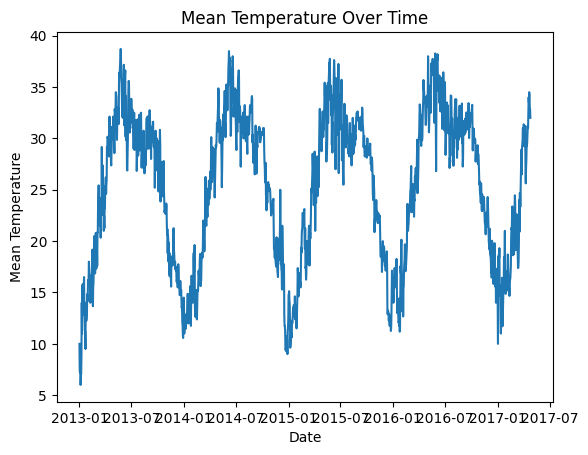

Correlation between mean temperature and time: 0.1671799530331576


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data from CSV
data = pd.read_csv("train.csv")

# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the data
print(data.head())

# Check for any patterns in the target variable over time (Visual Inspection)
plt.plot(data['date'], data['meantemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Over Time')
plt.show()

# Calculate correlation between the target variable and the timestamp (Correlation Analysis)
correlation = data['meantemp'].corr(data['date'].dt.dayofyear)
print("Correlation between mean temperature and time:", correlation)




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data from CSV
data_with_date = pd.read_csv("train.csv")

# Convert 'date' column to datetime type
data_with_date['date'] = pd.to_datetime(data_with_date['date'])
# Extract additional features from 'date'
data_with_date['dayofweek'] = data['date'].dt.dayofweek
data_with_date['month'] = data['date'].dt.month
data_with_date['day'] = data['date'].dt.day
data_with_date['year'] = data['date'].dt.year

# Assuming 'meantemp' is the target variable
X_with_date = data_with_date.drop(['date', 'meantemp'], axis=1)
y_with_date = data_with_date['meantemp']

# Fit a Random Forest model
rf_with_date = RandomForestRegressor()
rf_with_date.fit(X_with_date, y_with_date)

# Get feature importances
feature_importances_with_date = pd.Series(rf_with_date.feature_importances_, index=X_with_date.columns)
print("Feature Importances:")
print(feature_importances_with_date)
print("\n")


data_without_date = pd.read_csv("train.csv")

# Compare model performance with and without 'date' feature
X_without_date = data_without_date.drop(['date', 'meantemp'], axis=1)
y_without_date = data_with_date['meantemp']
rf_without_date = RandomForestRegressor()
rf_without_date.fit(X_without_date, y_without_date)

# Get feature importances without 'date'
feature_importances_without_date = pd.Series(rf_without_date.feature_importances_, index=X_without_date.columns)
print("Feature Importances without 'date':")
print(feature_importances_without_date)
print('\n')

# Domain Knowledge: Based on the nature of the problem and data, decide if it's logical for the target variable to change with time

# Additional checks or analysis can be performed based on your specific requirements and domain knowledge.


Feature Importances:
humidity        0.067271
wind_speed      0.008387
meanpressure    0.819944
dayofweek       0.004262
month           0.062168
day             0.021876
year            0.016092
dtype: float64


Feature Importances without 'date':
humidity        0.109141
wind_speed      0.036302
meanpressure    0.854556
dtype: float64




Auto correlations and Partial auto correlation

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.9 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.9 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/9.9 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/9.9 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.9 MB 5.0 MB/s eta 0:00:02
   ----------- -------------------------

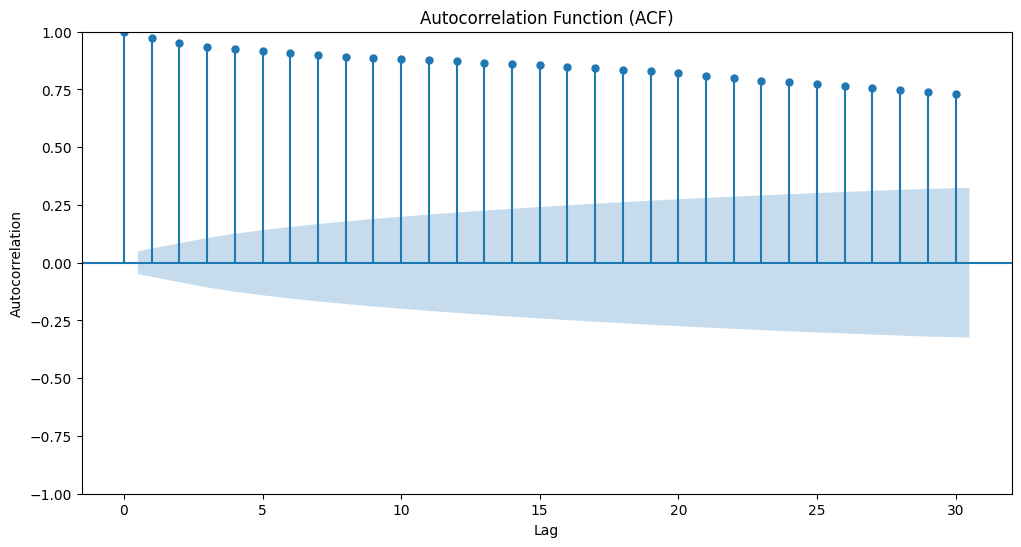

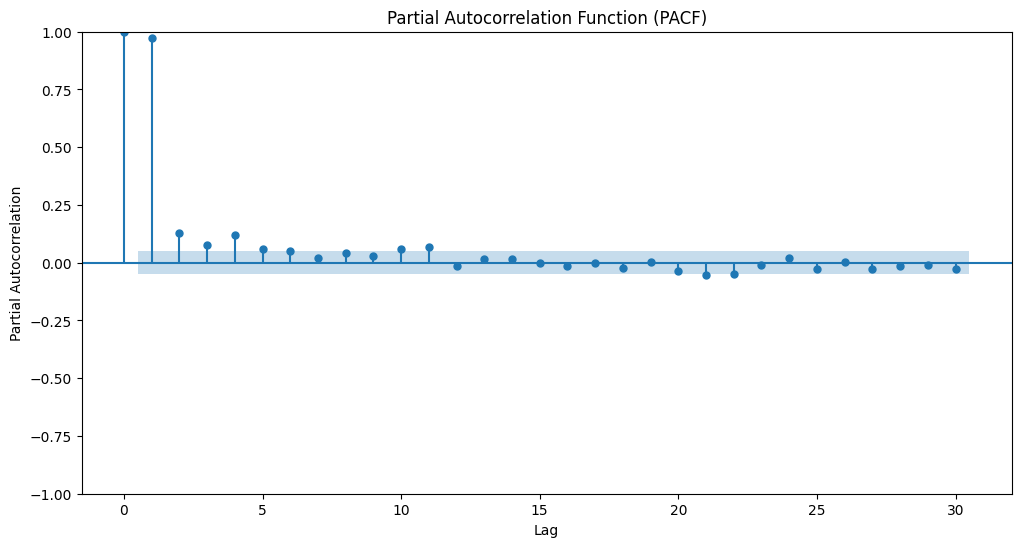

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data from CSV
data = pd.read_csv("train.csv")

# Convert 'date' column to datetime type and set it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Assuming 'meantemp' is the target variable
time_series = data['meantemp']

# Plot ACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(time_series, lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(time_series, lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
